<img src="data/drill_ship.png" style="width:300px; float:left">
<h1 style="text-align: center; color:teal">Data Science and Machine Learning for Planet Earth - Assessment</h1>

<h3 style="text-align: center; color:darkgray">Taken by MSc students on the ACSE, EDSML and GEMS courses</h3>

<h2 style="text-align: center; color:darkred">09:00 – 17:00 BST, Friday 17th of November 2023</h2>

<h2 style="text-align: center; color:red">REMINDER: THIS IS AN INDIVIDUAL ASSESSMENT</h2>

# 🐟 Read the `README.md` file for important information:

We strongly recommend that you read the `README.md` file, and even keep it open on GitHub for referencing during the assessement. It contains more detail on:

- <h3 style="color:teal">Description of the features of your data, and what they mean</h3>
- <h3 style="color:brown">A recommended workflow for this assessment</h3>
- <h3 style="color:teal">A reminder about what constitutes plagiarism</h3>
- <h3 style="color:brown">Details about the assessment criteria</h3>
- <h3 style="color:teal">Submitting your assessment</h3>
- <h3 style="color:brown">Referrencing your sources</h3>

To keep this notebook tidy and small, all of the above are available in the `README.md` file in this repo. 

# 🌊 Predicting Lithologies for the Ocean Drilling Program

In this assessment, you are the **boss of your own AI consluting company**: ***<span style="color:teal">MSC-AI Consulting</span>***. Your client is the **Integrated Ocean Drilling Program** (IODP), a reputable research institution with the mission of drilling the seafloor in order to understand the dynamic of the Earth and its past climates. You know that IODP has approached other, competing AI consulting companies: so don't let them see your answer, and try to do better than them to convince the client to give you the best score!

IODP routinely uses two different types of data:

1. **Cores**: A core is a piece of rock recovered from the seafloor. This allows geologist to perform analysis on the material, and to identify exactly what type of rock is present. Cores are however difficult to recover, and expensive. You can <a href="https://www.ga.gov.au/scientific-topics/marine/survey-techniques/sedimentary-coring-drilling">learn more about cores here if you want</a>.
2. **Downhole (wireline) logs**: IODP can also use downhole or wireline logs, i.e. data from  instruments that are lowered in a drill hole by research geologists. Drill holes can be very deep, down to several kilometers below the water-sediment interface (the unit used is `Depth_WMSF`, also known as meters below seafloor - larger numbers means deeper in the well). Downhole logs record properties of the rocks they measure, including natural gamma radiation (total gamma ray `HCGR`, potassium `HFK`, thorium `HTHO`, uranium `HURA`, shallow and deep penetration resistivity (`IDPH` and `IMPH`) and neutron porosity (`SFLU`). The goal is to use these properties measured continuously to estimate the **lithology** (i.e. type of rock) present. More details are provided <a href="https://en.wikipedia.org/wiki/Well_logging">on this website if you are interested</a>.

IODP has been experimenting recently with a brand new type of downhold log called <code>munsel_color</code>. They reckon that this new log type alongside the others could help in the identification of the lithology from wireline log data. They are very excited to test this, and have contacted you to help them - so you see this type of log for the first time.

## ⛴️ Your task

You are given drilling and logging data (`data/lithology.csv`) that can be used for training and testing, and that contains data from a single well (a drilling location) from 0 to 450 MWSF. In the context of the Integrated Ocean Drilling Program (IODP), the acronym **WMSF** stands for **Water-Depth Meters Below Seafloor**. This unit of measurement is commonly used in ocean drilling and marine geology to specify the depth below the seafloor at which samples are taken or observations are made. 

You are also being given a second file file (`data/new_samples.csv`) that contains logging data **in the same well** but from 450 WMSF down to 700 MWSF (so deeper than your training data). There is no core data in this interval, only logging data. This means that the `lithology` is not known, and **your goal is to use this wireline log data to predict lithology**. 

The following diagrams illustrates this situation:

<img src="data/well.jpg" style="width:600px;">

IODP wants you to train the best algorithm to classify lithology based on the log data provided. The also give you some strict guidance about what they want:

1. 🪸 You can prepare your data any way you want, and select any features you want. But as mentioned previously, IODP is very keen on using their new logging tool called `munsell_color` for your predictions. They stipulate that you need to use this feature in your data pipeline - how you use it is up to you.
<br><br>
2. 🪸 To predict `lithology`, you can use **any parametric model** from sklearn that you prefer. This includes for instance `LogisticRegression`, `SVC(kernel="linear")`, and many others. If you don't know whether your algorithm is parametric, you can try to call the `.coef_` method on it after you `fit` it. If you get an error, it is not parametric and using this model would disqualify you (for instance, `SVC()`, `RandomForest`, `KNeighborsClassifier` are not parametric). You are also told that using `ensemble methods` is not allowed. And you are strongly discouraged from using `MLPClassifier` (too long to train, and too many coefficients - see criteria 2 below).
<br><br>
3. 🪸 You need to put your entire workflow within a `pipeline` object. This pipeline can be of arbitrary complexity, but it needs to ***1.*** be able to take raw data and produce a predictions of labels directly, and ***2.*** the last position of your pipeline should be your parametric estimator (so if IODP does something like `pipeline[-1]` in their automatic testing they will obtain your estimator object).
<br><br>
4. 🪸 IODP will assess the performance of your algorithm in two ways. First, they will use the `F1 macro averaging` score on the label of your **unseen data** (i.e. the data in `data/new_samples.csv`), and subtract the `F1 macro averaging` score of your **test set** (which you can choose as you see fit). The smaller the difference between your test set score and the unseen data score, the better. This implies that they will want to have access to your test and train sets (see **Part C - Writing a class** for details).
<br><br>
5. 🪸 IODP also prefers a balance between high F1 macro score, but simpler models with **as few model coefficients (i.e. model weights) as possible** (as a reminder, the number of weights is exactly proportional to the number of features seen by the classifier). This is why, as a second assessment of your model performance, IODP will look at the ratio of your `F1 macro` score on the predicted **unseen data** divided by the **number of coefficients** in your model (i.e. `model.coef_.shape[1]`), this ratio then multiplied by 100 (higher=better). Hence, you should aim for as few weights as possible (i.e. coefficients) in your model whilst maintaining a decent performance. And as a reminder of point 1. above, you need to include the `munsell_color` feature one way or another in your classifier.
<br><br>
6. 🪸 For fairness, IODP wants you to set `random_state=42` for any algorithm that requires a random state. Failure to do so might result in a lower score.

# Run the cell below first

This will help automatically reload your class when you make changes to it in **Part C**.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


# 🐳  PART A: Exploratory Data Analysis (EDA) [30 marks]

In this first task, the client wants you to use this notebook to do some <b>Exploratory Data Analysis</b>. <br>
Make sure to keep the notebook clean, and running from top to bottom. Use markdown cells to explain what you are doing, why, and what your finding and conclusions are. Your goal is the understand your data and how you can best model it.

In [3]:
import pandas as pd
# Load the data:

df = pd.read_csv('data/log_data.csv') # This is your EDA (Part A) and training data (Parts B and C)

new_samples = pd.read_csv('data/new_data.csv') # This is the file you need to predict in parts B and C

In [4]:
df.head()


,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,munsel_color,lithology
0,0.0724,5.8481,0.0959,1.3131,-0.1712,1950.0000,1765.0116,0.0915,5R 4 10,Sandy Mud
1,0.0736,0.5881,0.0116,0.1206,0.0077,46.6488,124.4472,1.5966,10PB 0.2 18,Sandy Mud
2,0.0880,1.9945,0.0354,0.4317,0.0501,1950.0000,1950.0000,0.1589,2.5YR 8 10,Interbedded sand and mud
3,0.0920,22.4306,0.6522,3.3707,0.0916,1950.0000,1950.0000,9700.0000,10PB 0.2 18,Sandy Mud
4,0.2248,7.6691,0.1369,1.6566,-0.2301,1950.0000,1765.0116,0.0915,10PB 0.2 18,Sandy Mud


In [5]:
df.columns

Index(['DEPTH_WMSF', 'HCGR', 'HFK', 'HTHO', 'HURA', 'IDPH', 'IMPH', 'SFLU',
       'munsel_color', 'lithology'],
      dtype='object')

In [6]:
df.describe()

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU
count,11631.000000,11631.000000,11631.000000,11631.000000,11631.000000,11631.000000,11631.000000,11631.000000
mean,198.225905,39.625509,1.082232,6.367883,1.460541,335.231779,379.264376,566.190726
std,121.595955,21.074979,0.632142,3.186767,0.809733,730.624507,752.181656,2272.578630
min,0.072400,0.029500,-0.070000,-0.136600,-0.510500,0.339900,0.412000,0.091500
25%,94.273200,21.313550,0.528800,3.452300,0.802150,1.199500,1.103900,0.626950
50%,185.543200,43.047100,1.126700,6.980100,1.455000,1.354400,1.264100,0.750400
75%,297.100600,56.022800,1.578350,8.762100,1.990450,2.560100,124.447200,1.093800
max,449.058400,93.633400,2.793700,16.031500,5.351800,1950.000000,9700.000000,9700.000000


In [7]:
df.isnull().sum()


DEPTH_WMSF      0
HCGR            0
HFK             0
HTHO            0
HURA            0
IDPH            0
IMPH            0
SFLU            0
munsel_color    0
lithology       0
dtype: int64

visualization the distribution of different lithology classes 

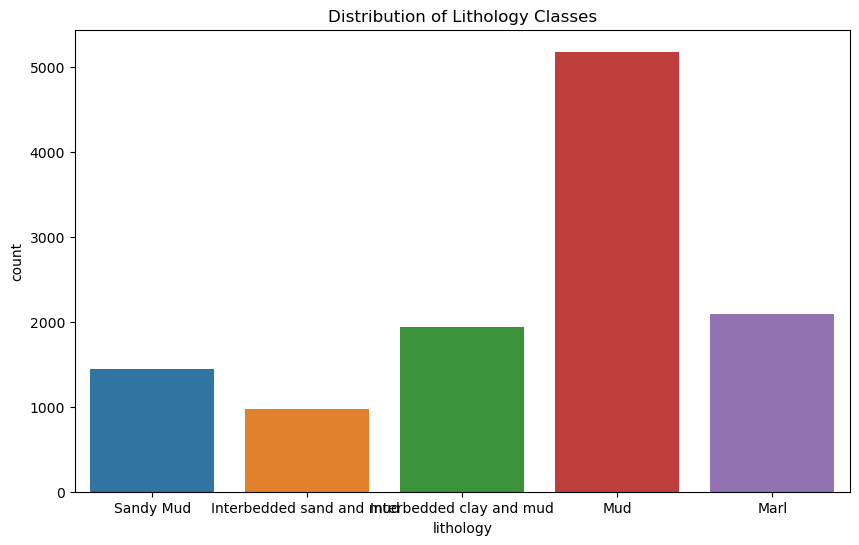

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='lithology', data=df)
plt.title('Distribution of Lithology Classes')
plt.show()

Histogram representing exploration of numeric features

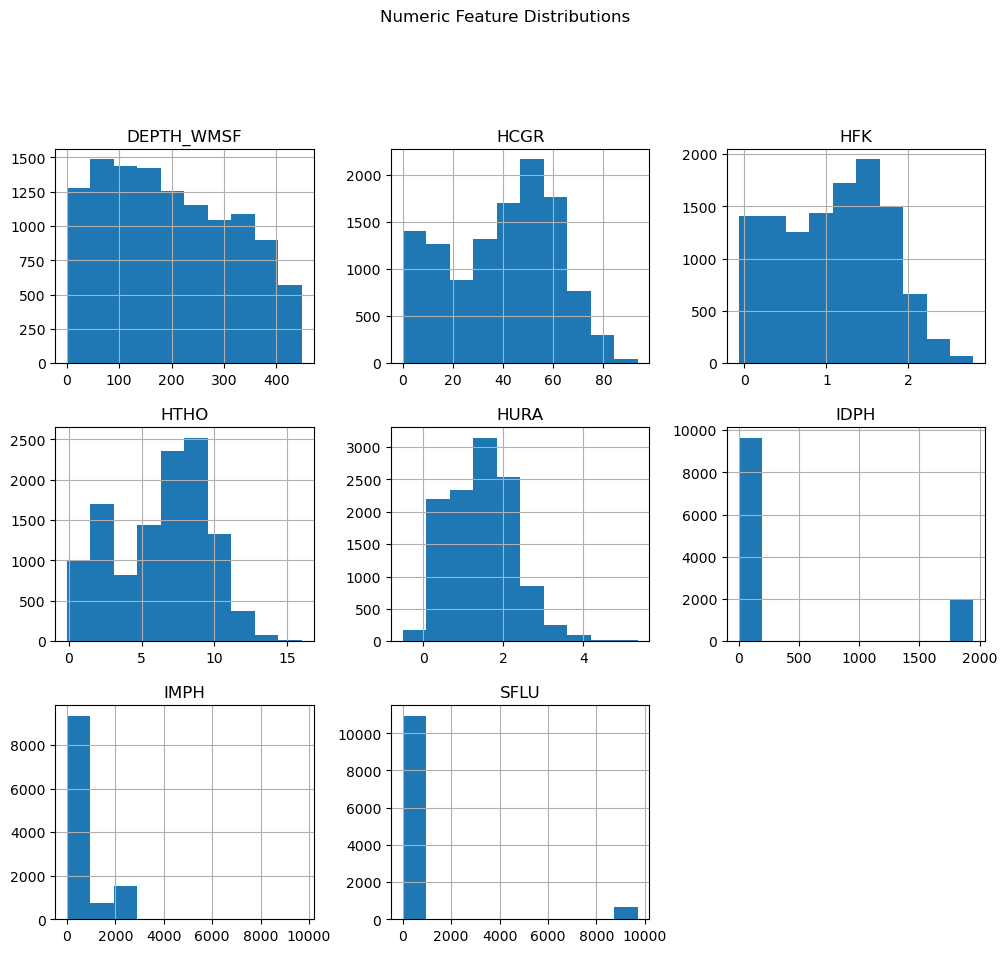

In [9]:
# Explore numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].hist(figsize=(12, 10))
plt.suptitle('Numeric Feature Distributions', y=1.02)
plt.show()


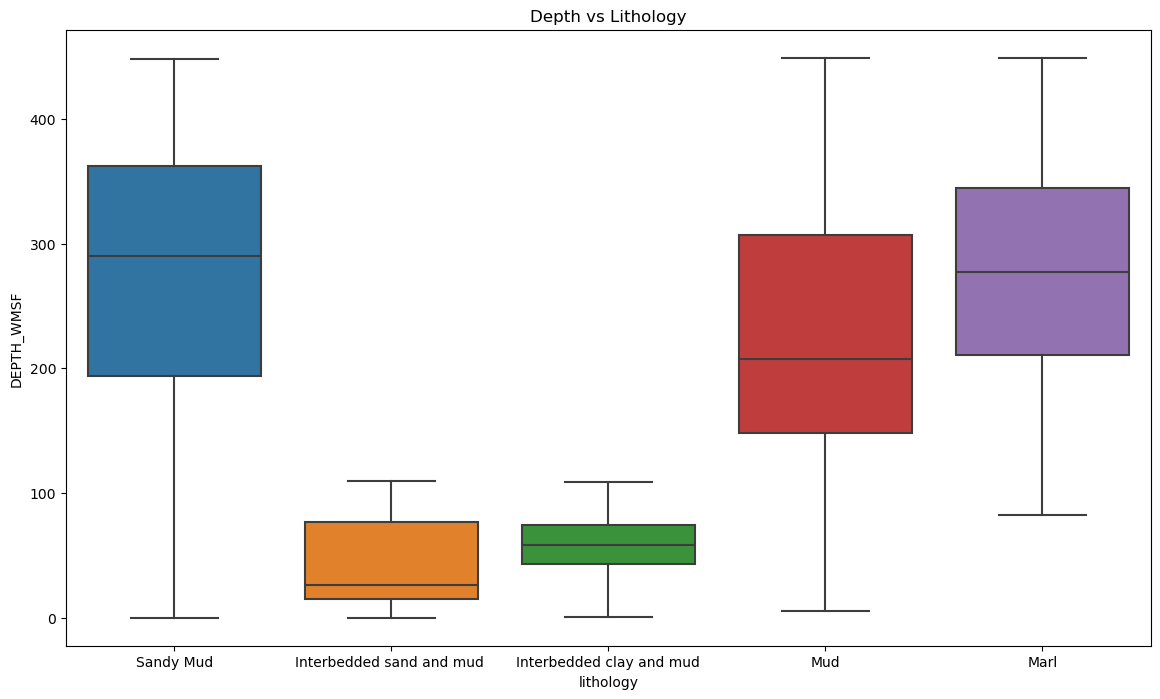

In [10]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='lithology', y='DEPTH_WMSF', data=df)
plt.title('Depth vs Lithology')
plt.show()

Boxplot to detect any outliers within the data

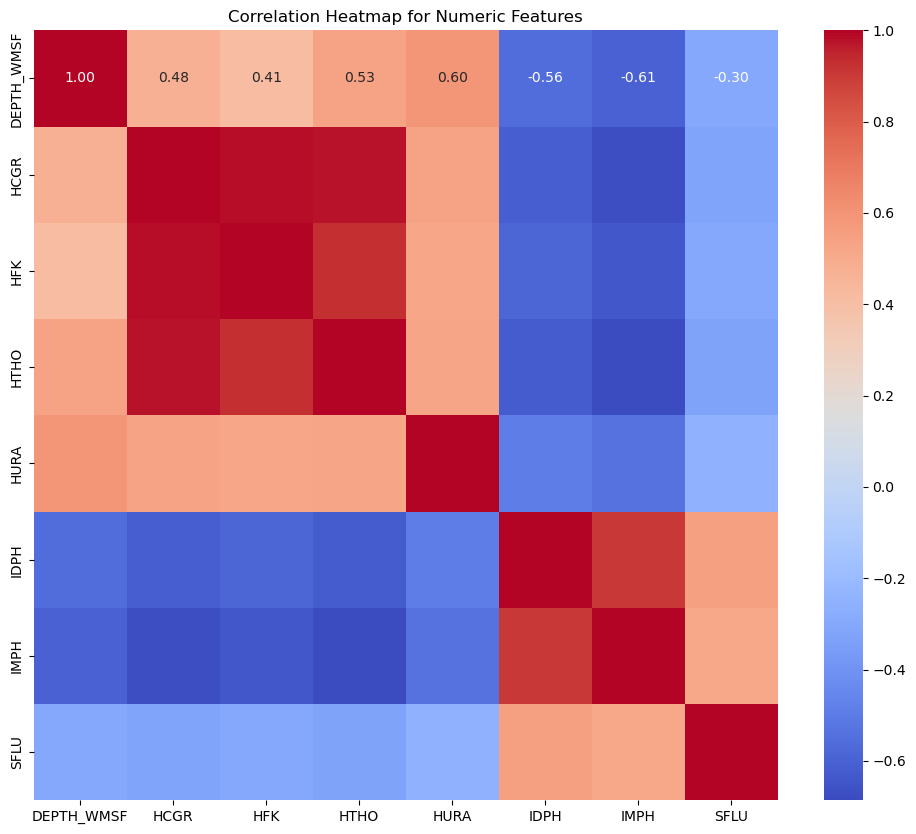

In [11]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
#correlation matrix
correlation_matrix = numeric_features.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Features')
plt.show()


The correlation heatmap above represents how different numeric columns relates with each other

# 🐠 PART B: Finding the best model [30 marks]

Once you understand your data, you can start to find the best model. Remember that IODP has a few criteria for you:
1. You must at least use the `munsell_color` feature in your model
2. You must write the entire model as a `pipeline` that can process raw data and return a prediction. Your estimator must be a `parametric model`, i.e. `model.coef_` must return the coefficients of the model.
3. Your model will be evaluated against performance on the unseen data. This will include checking how close your predicted `F1 macro` of your test set is to the `F1 macro` calculated by your model on the unseen data (IODP has secret labels for that).
4. Your model will also be evaluated for simplicity versus performance, i.e. the ratio of `F1 macro` on the unseen data against the `number of coefficients` (not their values) of your model.

Once you have defined and trained your best model, please run the cell below the next empty cell. This cell assumes that 1. your trained best model is called `best_model`, your `X_test` and your `y_test_cat` are named exactly like this (and `y_train_cat` represents the `y_test` transformed into categorical value. Running this cell will save values that will be used for automatic testing of your results, so this is important. If your variables have different names, you can change this code.

In [12]:
#importing requrired libraries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [13]:
# Data Preprocessing
df['munsel_color'] = df['munsel_color'].astype(str)

In [14]:
X = df.drop('lithology', axis=1)
y = df['lithology']

In [15]:
# Train-test split
X_train, X_test, y_train, y_test_cat = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Pipeline construction
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [17]:
all_cols = X_train.isnull().sum()[(X_train.isnull().sum()/X_train.shape[0])<0.3].index

In [18]:
all_cols

Index(['DEPTH_WMSF', 'HCGR', 'HFK', 'HTHO', 'HURA', 'IDPH', 'IMPH', 'SFLU',
       'munsel_color'],
      dtype='object')

In [19]:
import seaborn as sns
import numpy as np

corr_data = X_train[all_cols].select_dtypes(include=np.number).corr()
corr_data = corr_data.unstack().reset_index()
corr_data.columns = ['feature_1', 'feature_2','corr']
corr_data = corr_data[(corr_data['corr']>0.8) & (corr_data['corr'] < 1)]
corr_data

,feature_1,feature_2,corr
10,HCGR,HFK,0.983569
11,HCGR,HTHO,0.977719
17,HFK,HCGR,0.983569
19,HFK,HTHO,0.923758
25,HTHO,HCGR,0.977719
26,HTHO,HFK,0.923758
46,IDPH,IMPH,0.903047
53,IMPH,IDPH,0.903047


The code above focuses on identifying pairs of features with correlation coefficients exceeding 0.8 and falling short of 1, indicative of a robust positive correlation. The resulting DataFrame, named corr_data, succinctly presents these feature pairs, offering valuable insights for tasks such as feature selection or addressing multicollinearity in statistical modeling. This analysis contributes to a comprehensive understanding of the interrelationships between variables in the dataset, enabling more informed decision-making in subsequent stages of data analysis and modeling.







In [20]:
cat_values = X_train[all_cols].select_dtypes(exclude = np.number)

In [21]:
cat_values

,munsel_color
2191,2.5G 1 8
5277,10B 8 12
11059,10B 8 12
5050,10B 8 12
4702,5P 3 6
...,...
11284,10B 8 12
5191,5P 3 6
5390,10B 8 12
860,10R 1 12


In [22]:
cat_values.columns

Index(['munsel_color'], dtype='object')

In [23]:
cat_values.munsel_color.value_counts()

munsel_color
10B 8 12       3387
5P 3 6         1355
2.5G 1 8       1272
10PB 0.2 18     947
10R 1 12        690
10P 5 30         68
2.5P 8 2         59
5PB 3 32         59
10PB 1 42        56
2.5BG 3 24       55
7.5P 2 16        55
5GY 6 16         54
7.5P 0.8 16      53
7.5G 1 2         50
2.5G 7 2         50
2.5R 8 6         50
7.5YR 9 20       49
2.5YR 8 10       49
10RP 5 22        49
5BG 0.4 2        48
5YR 5 14         48
7.5PB 4 34       48
10PB 2 42        47
10P 5 14         47
5PB 1 14         47
5PB 5 18         47
2.5R 6 22        46
2.5BG 5 16       43
5R 4 10          43
10R 2 16         43
10Y 2 2          43
5G 7 34          41
10BG 6 12        41
5Y 6 16          40
10GY 6 18        40
5P 7 20          40
10G 4 18         38
2.5P 0.4 22      37
10GY 4 4         36
10B 2 6          34
Name: count, dtype: int64

In [24]:
to_ordinal=['munsel_color']

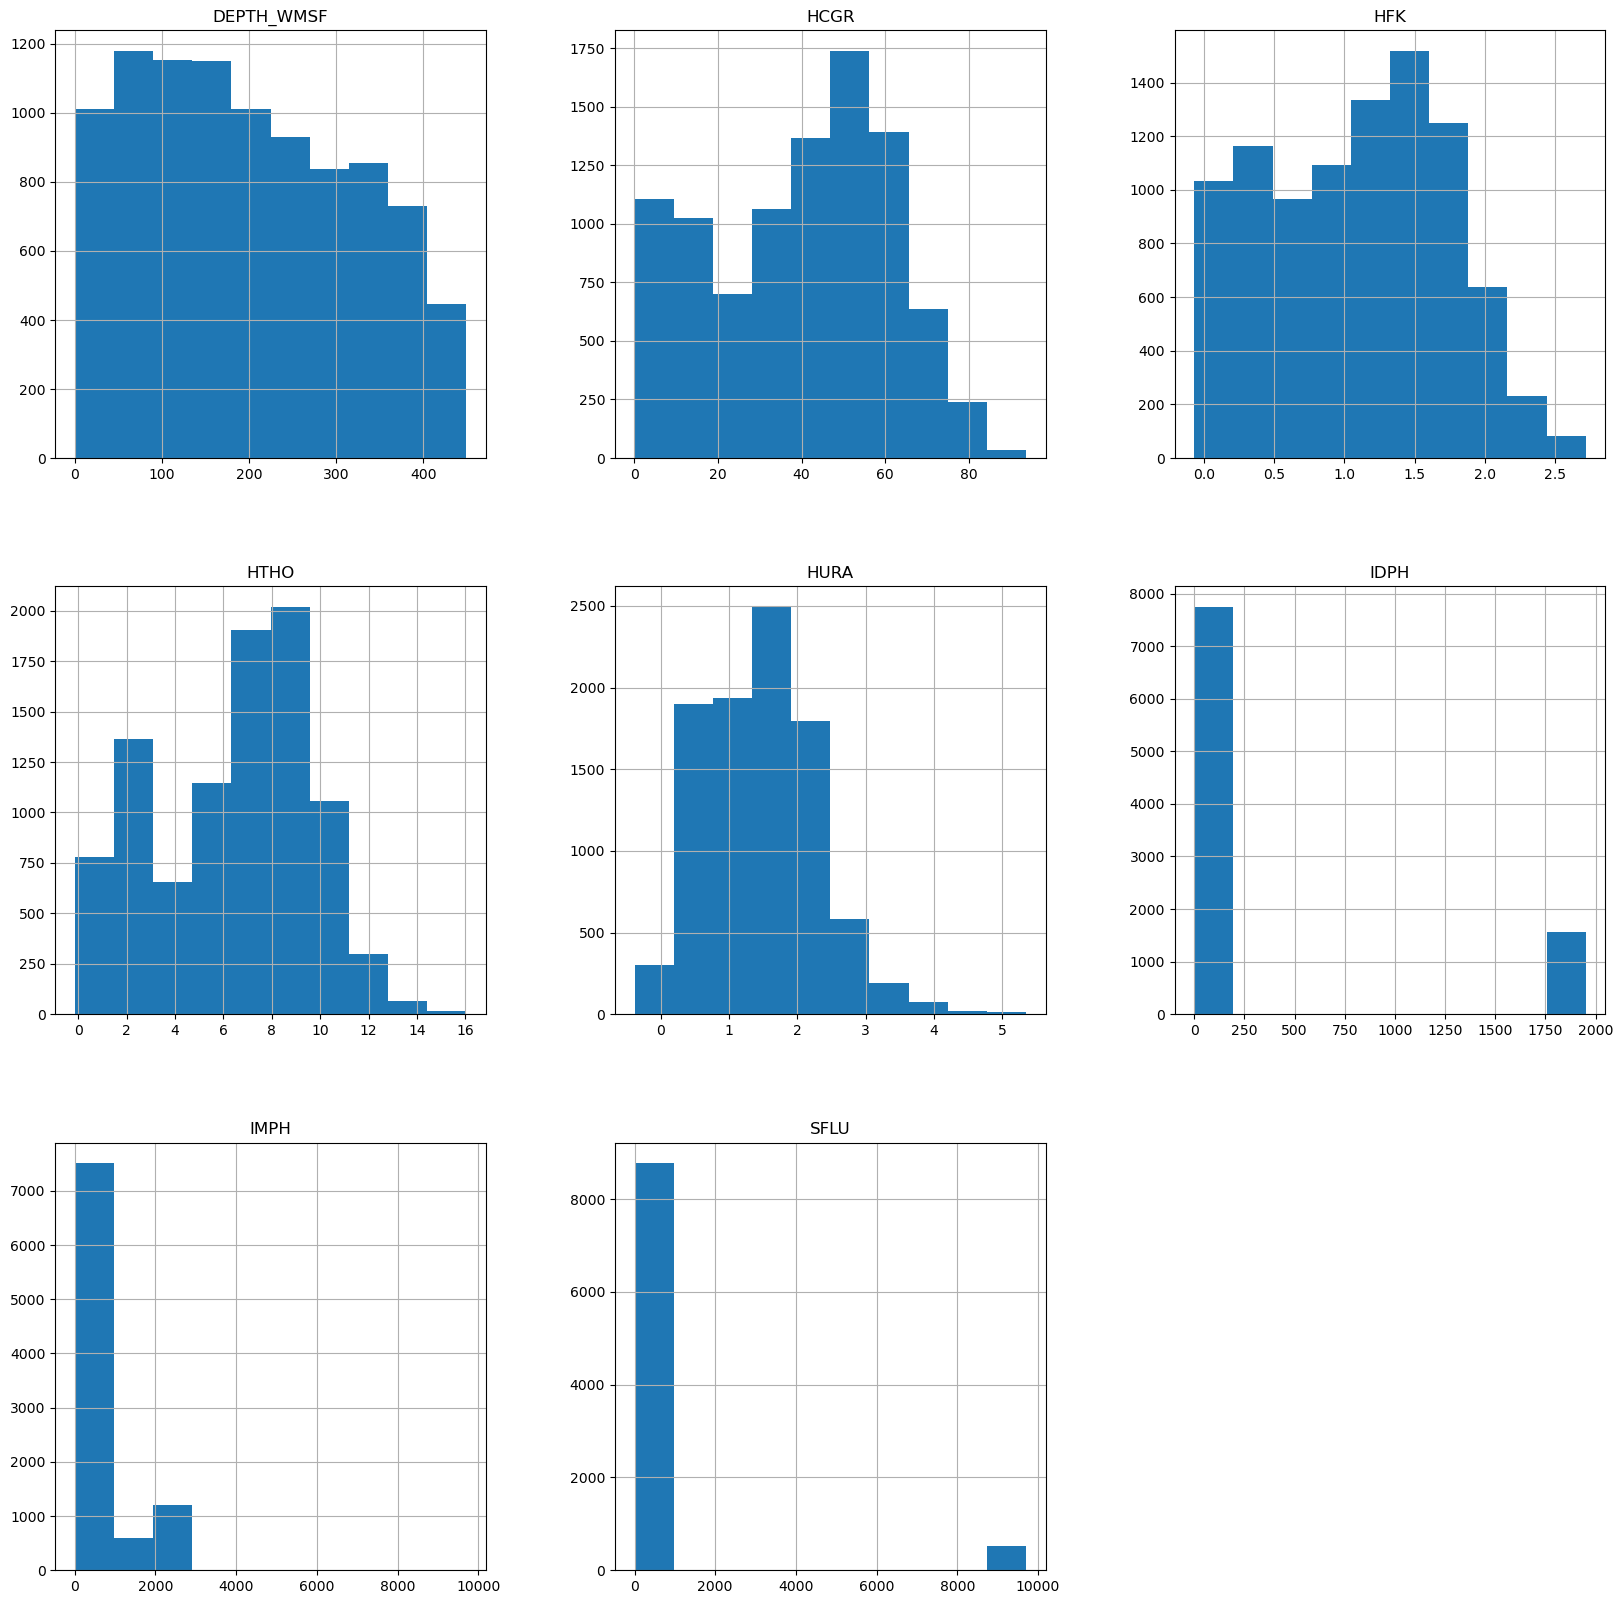

In [25]:
num_data = X_train[all_cols].select_dtypes(include = np.number)
num_data.hist(figsize=(20,20));

The histograms provide a visual representation of the distribution of values within each feature, offering insights into the data's central tendencies and spread. This graphical exploration is valuable for identifying patterns, outliers, and potential data transformations, contributing to a comprehensive understanding of the dataset's characteristics. 

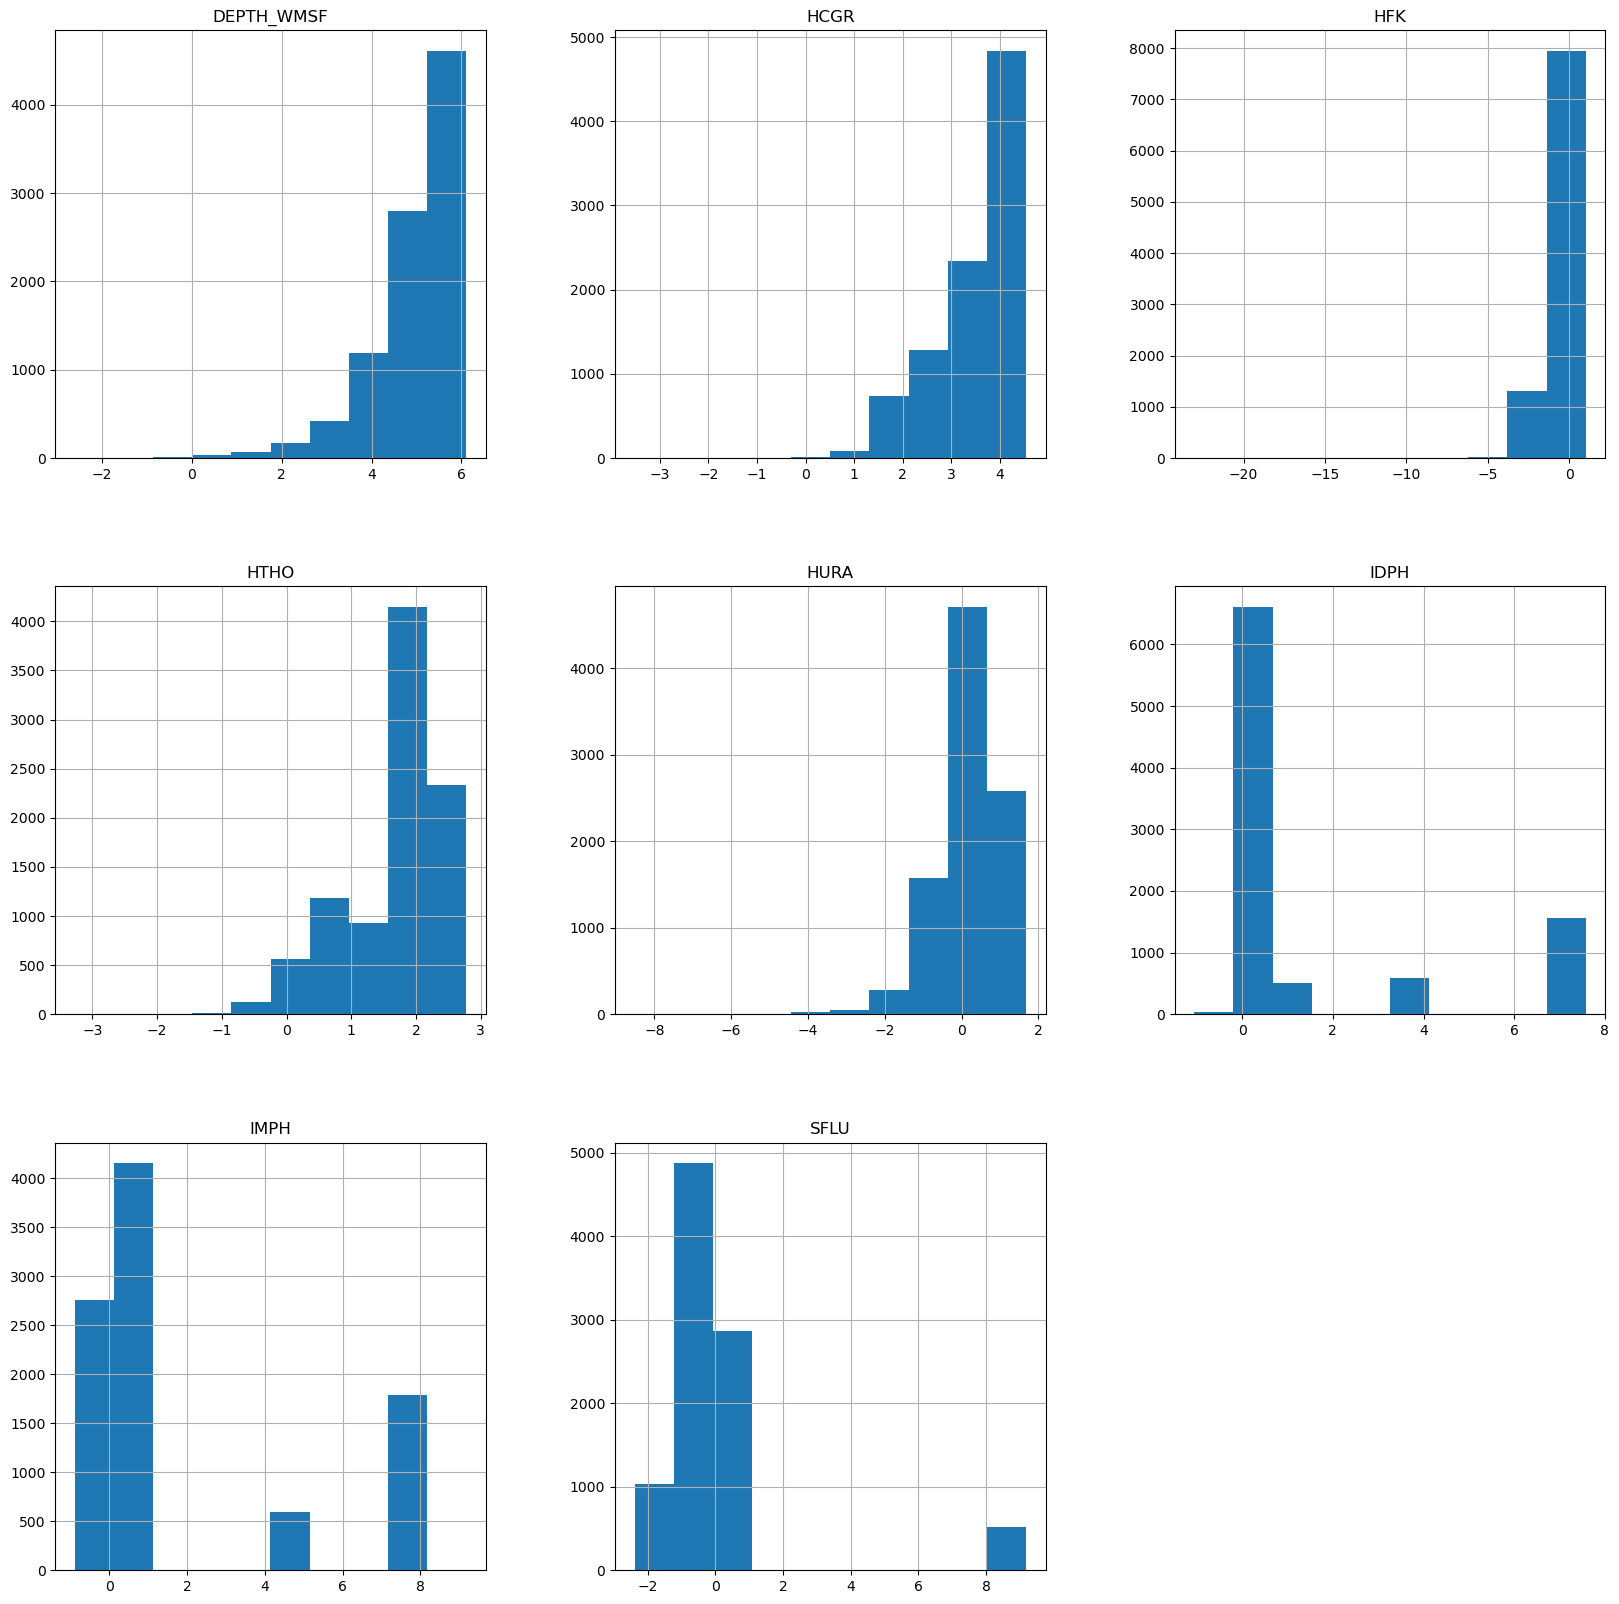

In [26]:
np.log(num_data+1e-10).hist(figsize=(20,20));

In [28]:
To_log= ['DEPTH_WMSF', 'HCGR', 'HFK', 'HTHO', 'HURA', 'IDPH', 'IMPH', 'SFLU']

The logarithmic transformation is particularly useful for addressing right-skewed distributions and compressing the scale of large values. This transformation can reveal patterns and details that might be less apparent in the original data, providing a different perspective on the distributional characteristics of each variable.

In [29]:
# Pipeline construction
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

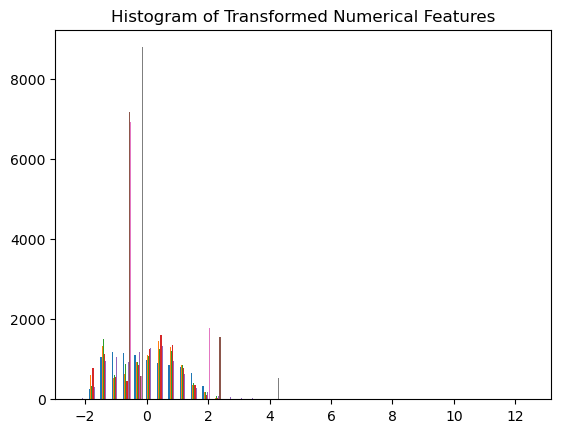

In [30]:
# Numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features)
    ])

# Fit and transform the numerical pipeline on the entire X_train dataset
transformed_data = preprocessor.fit_transform(X_train)
# Create a histogram
plt.hist(transformed_data, bins=40)
plt.title('Histogram of Transformed Numerical Features')
plt.show()



In [31]:
num_pipe.fit_transform(X_train[To_log])

array([[-1.03754859, -1.395373  , -1.27985799, ..., -0.45119494,
         2.10792562, -0.24363983],
       [-0.24184953,  1.81342503,  1.46385276, ..., -0.45301627,
        -0.49739915, -0.2438603 ],
       [ 1.69570917,  1.22057643,  1.30166609, ..., -0.45271435,
        -0.49708219, -0.24382065],
       ...,
       [-0.21417304,  0.91540665,  1.16846394, ..., -0.45312564,
        -0.4974851 , -0.24390166],
       [-1.37535215, -0.47414582, -0.55397758, ..., -0.39046715,
        -0.3324583 , -0.24344637],
       [ 0.34117721,  1.46515048,  1.84081008, ..., -0.45268115,
        -0.49708473, -0.24380703]])

In [32]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
class LogTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, seed = 1e-5):
        self.seed=seed
        return None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return np.log(X+self.seed)


class ZeroTransform(TransformerMixin, BaseEstimator):
    """This transformer replaces negative values by zeros: elemental concentrations cannot be < zero."""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = np.where(X < 0, 0, X)
        return X

In [34]:
from sklearn.pipeline import make_pipeline
num_log_pipe = make_pipeline(SimpleImputer(), ZeroTransform(), LogTransformer(seed=6e-3), RobustScaler())
test_num = num_log_pipe.fit_transform(X_train[To_log])

In [35]:
num_log_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('zerotransform', ZeroTransform()),
                ('logtransformer', LogTransformer(seed=0.006)),
                ('robustscaler', RobustScaler())])

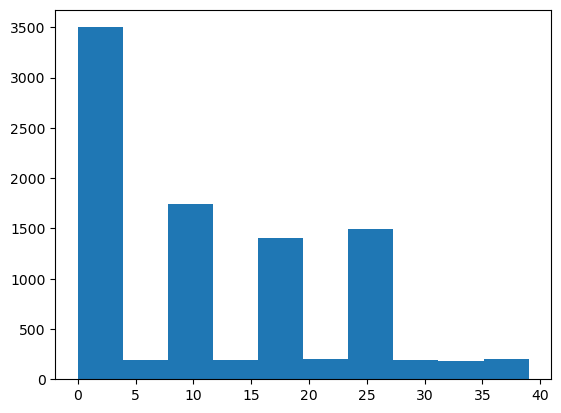

In [36]:
from sklearn.preprocessing import OrdinalEncoder
cat_pipe_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
plt.hist(cat_pipe_ordinal.fit_transform(X_train[to_ordinal]));

In [37]:
to_hash=['DEPTH_WMSF', 'HCGR', 'HFK', 'HTHO', 'HURA', 'IDPH', 'IMPH', 'SFLU',
        'lithology']

In [38]:
from sklearn.feature_extraction import FeatureHasher

cat_pipe_hashing = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('feature_hashing', FeatureHasher(n_features=10, input_type='string'))
])


In [39]:
cat_pipe_hashing

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('feature_hashing',
                 FeatureHasher(input_type='string', n_features=10))])

In [40]:
from sklearn.preprocessing import OneHotEncoder
cat_pipe_onehot = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [41]:
cat_pipe_onehot

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))])

In [42]:
from sklearn.compose import ColumnTransformer


hashers = []


for feature in to_hash:
    hashers.append((f'hashed_{feature}',make_pipeline(SimpleImputer(strategy='most_frequent'), FeatureHasher(input_type='string',n_features=1024)), [feature]))

hashers_pipe = ColumnTransformer(hashers)

In [43]:
hashers_pipe

ColumnTransformer(transformers=[('hashed_DEPTH_WMSF',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('featurehasher',
                                                  FeatureHasher(input_type='string',
                                                                n_features=1024))]),
                                 ['DEPTH_WMSF']),
                                ('hashed_HCGR',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('featurehasher',
                                                  FeatureHasher(input_type='stri...
                                ('hashed_SFLU',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('featurehasher',
                                                  FeatureHasher(input_type='string',
                                                                n_features=1024))]),
                                 ['SFLU']),
                                ('hashed_lithology',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('featurehasher',
                                                  FeatureHasher(input_type='string',
                                                                n_features=1024))]),
                                 ['lithology'])])

In [44]:
# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))  
])

In [45]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['DEPTH_WMSF', 'HCGR', 'HFK', 'HTHO', 'HURA', 'IDPH', 'IMPH', 'SFLU'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [62]:
# Training the model
best_model= pipeline
best_model.fit(X_train, y_train)

# Model evaluation on the test set
y_pred_test = best_model.predict(X_test)
f1_macro_test = f1_score(y_test_cat, y_pred_test, average='macro')

In [63]:
# RUN THIS CELL TO SAVE YOUR SCORES TO DISC - ESSENTIAL FOR AUTOMATIC TESTING

from sklearn.metrics import f1_score

pd.Series(f1_score(y_test_cat, best_model.predict(X_test), average='macro'), name='f1_test').to_csv('f1_test.csv', index=False)
pd.Series(best_model.predict(X_test), name='y_pred').to_csv('y_pred_notebook.csv', index=False)

# 🦈 PART C: Write the `LithoEstimator` Class [40 marks]

This is the final piece of the assignment. If you open the `litho_estimator.py` file you will see that the skeleton of a class called `LithoEstimator` has been created for you. Your job is to finish the class in the file, based on what you found out in **parts A and B**. I expect this class to have the following behaviour:

1. When a new instance of the class is created, it will automatically create a machine learning model (a pipeline with an estimator) that is defined in the same way as your most performant algorithm. That is to say, use the same parameters (and hyperparameters) than you best estimator, but do not do any EDA or hyperparameter tuning (this would be done in **parts A and B** in this notebook).
2. At initialisation time, you need to create the variables `self.X_train`, `self.X_test`, `self.y_train` and `self.y_test`.
3. The class will automatically train your algorithm on the `X_train` and `y_train`
4. The `x_test_score(self)` method should return the `f1_score` with `average=macro` of your predicted `X_test`.
5. The `get_Xs(self)` method should return `X_train` and `X_test`
6. The `get_ys(self)` method should return `y_train` and `y_test`
7. The `predict(self, path_to_new_file)` method should return the `y_pred` (predictions) for any file path we give to the method. The default value for `path_to_new_file` is already set for you as the `new_data.csv` file.
8. The `get_model(self)` method should return the entire **trained model** (pipeline) that includes the final predictor. I recommend you save your model as an instance variable (`self.model`).
9. You can add as many other methods as needed, or write additional classes such as custom transformers or others in the same python file.

If you want a rough test of your code, you can try to run the cells below:

In [64]:
from litho_estimator import LithoEstimator

model = LithoEstimator()

model.get_Xs() # Should return your untransformed X_train and X_test

(       DEPTH_WMSF     HCGR     HFK     HTHO    HURA     IDPH       IMPH  \
 2191      72.5916  10.3709  0.2767   1.7036  0.5228   2.5601  1950.0000   
 5277     169.0996  77.8822  2.0090  13.2088  0.4124   1.2378     1.0616   
 11059    404.1004  65.4090  1.9066   9.8112  1.4154   1.4570     1.2987   
 5050     160.5264  55.5550  1.4440   9.3439  1.4558   1.2341     1.0815   
 4702     149.8828  45.8100  1.2860   7.1603  2.0321   1.7005     1.6684   
 ...           ...      ...     ...      ...     ...      ...        ...   
 11284    424.0504  40.2457  1.0250   6.9039  1.7497   1.2675     1.2635   
 5191     166.4932  23.6893  0.6416   3.8398  1.2527   1.7263     1.7348   
 5390     172.4564  58.9884  1.8225   8.2404  1.8531   1.1584     0.9973   
 860       31.6204  29.7530  0.7350   5.2369  0.9707  46.6488   124.4472   
 7270     239.8132  70.5547  2.2470   9.4672  2.7599   1.4811     1.2968   
 
          SFLU  munsel_color  
 2191   1.1648            17  
 5277   0.6727          

In [65]:
model.get_ys() # Should return your  y_train and y_test

(2191      Interbedded clay and mud
 5277                           Mud
 11059                          Mud
 5050                           Mud
 4702                          Marl
                    ...            
 11284                          Mud
 5191                          Marl
 5390                           Mud
 860      Interbedded sand and mud 
 7270                           Mud
 Name: lithology, Length: 9304, dtype: object,
 7323                         Marl
 5082                         Marl
 1078     Interbedded clay and mud
 1277     Interbedded clay and mud
 7912                          Mud
                    ...           
 4429                          Mud
 5339                          Mud
 11231                         Mud
 3488                          Mud
 8307                         Marl
 Name: lithology, Length: 2327, dtype: object)

In [66]:
model.x_test_score() # Should return your test F1 score macro

0.7934688338944632

In [67]:
model.get_model() # Should return your trained pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

### ☄️ GOOD LUCK!

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.